In [33]:
import requests
from bs4 import BeautifulSoup

In [34]:
url = 'https://br.financas.yahoo.com/quote/PETR4.SA?p=PETR4.SA&.tsrc=fin-srch'
r = requests.get(url)

In [5]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import time
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import MetaTrader5 as mt5

In [6]:
# conecte-se ao MetaTrader 5
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()

In [7]:
# consultamos o estado e os parâmetros de conexão
print(mt5.terminal_info())
# obtemos informações sobre a versão do MetaTrader 5
print(mt5.version())

TerminalInfo(community_account=True, community_connection=True, connected=True, dlls_allowed=False, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=2998, maxbars=100000, codepage=1252, ping_last=29113, community_balance=0.0, retransmission=0.0, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='Portuguese (Brazil)', path='C:\\Users\\Maike.mota\\AppData\\Roaming\\MetaTrader 5', data_path='C:\\Users\\Maike.mota\\AppData\\Roaming\\MetaQuotes\\Terminal\\FA37627ACD9883F78C7D602A14544768', commondata_path='C:\\Users\\Maike.mota\\AppData\\Roaming\\MetaQuotes\\Terminal\\Common')
(500, 2998, '15 Jul 2021')


In [8]:
simb = 'PETR4'
mt5.symbol_info_tick('PETR4')

Tick(time=1630494900, bid=27.05, ask=27.06, last=27.05, volume=100, time_msc=1630494900822, flags=0, volume_real=100.0)

In [6]:
def valor_acao():
    tempo = time.time() + 10
    while time.time() < tempo:
        tick = mt5.symbol_info_tick('PETR4')
        print(f'{simb} - last: {tick.last}, bid: {tick.bid}, ask:{tick.ask}', end='\r')
    return tick.last

In [7]:
for step in range(1,10):
    price=[]
    col =[]
    time_stamp = datetime.datetime.now()
    time_stamp = time_stamp.strftime('%Y-%m-%d %H:%M:%S')
    time.sleep(2)
    tick = mt5.symbol_info_tick('PETR4')
    price.append(tick.bid)
    col = [time_stamp]
    col.extend(price)
    df = pd.DataFrame(col)
    df = df.T
    df.to_csv('real time stock data.csv')
    print(col)

['2021-09-01 10:52:48', 27.0]
['2021-09-01 10:52:50', 27.0]
['2021-09-01 10:52:52', 27.0]
['2021-09-01 10:52:54', 27.0]


KeyboardInterrupt: 

In [47]:
import matplotlib.animation as animation
from matplotlib import style

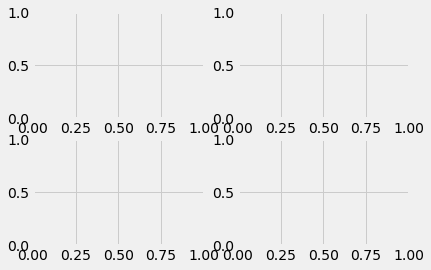

In [48]:
style.use('fivethirtyeight')
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

In [49]:
def animate(i):
    df = pd.read_csv('real time stock data.csv')
    ys = df.iloc[1:, 2].values
    xs = list(range(1, len(ys)+1))
    ax1.clear()
    ax1.plot(xs, ys)

    ys = df.iloc[1:, 3].values
    xs = list(range(1, len(ys)+1))
    ax2.clear()
    ax2.plot(xs, ys)

    ys = df.iloc[1:, 4].values
    xs = list(range(1, len(ys)+1))
    ax3.clear()
    ax3.plot(xs, ys)

    ys = df.iloc[1:, 5].values
    xs = list(range(1, len(ys)+1))
    ax4.clear()
    ax4.plot(xs, ys)

In [50]:
ani = animation.FuncAnimation(fig, animate, interval = 10000)
plt.tight_layout()
plt.show()

C:\Users\Maike.mota\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

In [9]:
import csv
import datetime
import time
import MetaTrader5 as mt5

tick = mt5.symbol_info_tick('PETR4')

x_value = 0
bid = tick.bid
ask = tick.ask

In [ ]:
ask

27.1

In [10]:
import MetaTrader5 as mt5

tick = mt5.symbol_info_tick('PETR4')

x_value = 0
bid = tick.bid
ask = tick.ask


In [11]:
import csv
import datetime
import time
import MetaTrader5 as mt5

tick = mt5.symbol_info_tick('PETR4')

x_value = 0
bid = tick.bid
ask = tick.ask

fieldnames = ["x_value", "bid", "ask"]


with open('data.csv', 'w') as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

while True:

    with open('data.csv', 'a') as csv_file:
        csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        info = {
            "x_value": x_value,
            "bid": bid,
            "ask": ask
        }

        csv_writer.writerow(info)
        print(x_value, bid, ask)

        time_stamp = datetime.datetime.now()
        x_value = time_stamp.strftime('%Y-%m-%d %H:%M:%S')

        tick = mt5.symbol_info_tick('PETR4')
        bid = tick.bid
        ask = tick.ask

    time.sleep(3)

0 27.04 27.06
2021-09-01 11:15:09 27.04 27.06
2021-09-01 11:15:12 27.04 27.06
2021-09-01 11:15:15 27.04 27.06
2021-09-01 11:15:18 27.04 27.06
2021-09-01 11:15:21 27.04 27.06
2021-09-01 11:15:24 27.04 27.06
2021-09-01 11:15:27 27.04 27.06
2021-09-01 11:15:30 27.04 27.06
2021-09-01 11:15:33 27.04 27.06
2021-09-01 11:15:36 27.04 27.06
2021-09-01 11:15:39 27.04 27.06
2021-09-01 11:15:42 27.04 27.06
2021-09-01 11:15:45 27.04 27.06
2021-09-01 11:15:48 27.04 27.06
2021-09-01 11:15:51 27.04 27.06
2021-09-01 11:15:54 27.04 27.06
2021-09-01 11:15:57 27.04 27.06
2021-09-01 11:16:00 27.04 27.06


KeyboardInterrupt: 